In [220]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [221]:
data = pd.read_csv("credit_customers.csv")

In [222]:
data.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,residence_since,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6.0,critical/other existing credit,radio/tv,1169.0,no known savings,>=7,4.0,male single,none,4.0,real estate,67.0,none,own,2.0,skilled,1.0,yes,yes,good
1,0<=X<200,48.0,existing paid,radio/tv,5951.0,<100,1<=X<4,2.0,female div/dep/mar,none,2.0,real estate,22.0,none,own,1.0,skilled,1.0,none,yes,bad
2,no checking,12.0,critical/other existing credit,education,2096.0,<100,4<=X<7,2.0,male single,none,3.0,real estate,49.0,none,own,1.0,unskilled resident,2.0,none,yes,good
3,<0,42.0,existing paid,furniture/equipment,7882.0,<100,4<=X<7,2.0,male single,guarantor,4.0,life insurance,45.0,none,for free,1.0,skilled,2.0,none,yes,good
4,<0,24.0,delayed previously,new car,4870.0,<100,1<=X<4,3.0,male single,none,4.0,no known property,53.0,none,for free,2.0,skilled,2.0,none,yes,bad


In [223]:
data.isnull().sum()

checking_status           0
duration                  0
credit_history            0
purpose                   0
credit_amount             0
savings_status            0
employment                0
installment_commitment    0
personal_status           0
other_parties             0
residence_since           0
property_magnitude        0
age                       0
other_payment_plans       0
housing                   0
existing_credits          0
job                       0
num_dependents            0
own_telephone             0
foreign_worker            0
class                     0
dtype: int64

In [224]:
data.dtypes

checking_status            object
duration                  float64
credit_history             object
purpose                    object
credit_amount             float64
savings_status             object
employment                 object
installment_commitment    float64
personal_status            object
other_parties              object
residence_since           float64
property_magnitude         object
age                       float64
other_payment_plans        object
housing                    object
existing_credits          float64
job                        object
num_dependents            float64
own_telephone              object
foreign_worker             object
class                      object
dtype: object

In [225]:
data[['sex', 'marriage']] = data.personal_status.str.split(" ", expand = True)
data.drop(['personal_status'], axis=1, inplace = True)

In [226]:
categorical_feature = [feature for feature in data.columns if data[feature].dtype == "O" ]

data[categorical_feature].head()

,checking_status,credit_history,purpose,savings_status,employment,other_parties,property_magnitude,other_payment_plans,housing,job,own_telephone,foreign_worker,class,sex,marriage
0,<0,critical/other existing credit,radio/tv,no known savings,>=7,none,real estate,none,own,skilled,yes,yes,good,male,single
1,0<=X<200,existing paid,radio/tv,<100,1<=X<4,none,real estate,none,own,skilled,none,yes,bad,female,div/dep/mar
2,no checking,critical/other existing credit,education,<100,4<=X<7,none,real estate,none,own,unskilled resident,none,yes,good,male,single
3,<0,existing paid,furniture/equipment,<100,4<=X<7,guarantor,life insurance,none,for free,skilled,none,yes,good,male,single
4,<0,delayed previously,new car,<100,1<=X<4,none,no known property,none,for free,skilled,none,yes,bad,male,single


In [227]:
categorical_feature

['checking_status',
 'credit_history',
 'purpose',
 'savings_status',
 'employment',
 'other_parties',
 'property_magnitude',
 'other_payment_plans',
 'housing',
 'job',
 'own_telephone',
 'foreign_worker',
 'class',
 'sex',
 'marriage']

In [228]:
print("Number of Categorical_feature:", len(categorical_feature))

Number of Categorical_feature: 15


In [229]:
numerical_feature = [feature for feature in data.columns if data[feature].dtype != "O" ]

data[numerical_feature].head()

,duration,credit_amount,installment_commitment,residence_since,age,existing_credits,num_dependents
0,6.0,1169.0,4.0,4.0,67.0,2.0,1.0
1,48.0,5951.0,2.0,2.0,22.0,1.0,1.0
2,12.0,2096.0,2.0,3.0,49.0,1.0,2.0
3,42.0,7882.0,2.0,4.0,45.0,1.0,2.0
4,24.0,4870.0,3.0,4.0,53.0,2.0,2.0


In [230]:
numerical_feature

['duration',
 'credit_amount',
 'installment_commitment',
 'residence_since',
 'age',
 'existing_credits',
 'num_dependents']

In [231]:
print("Number of Numerical_feature:", len(numerical_feature))

Number of Numerical_feature: 7


In [232]:
data.head(10)

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,other_parties,residence_since,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class,sex,marriage
0,<0,6.0,critical/other existing credit,radio/tv,1169.0,no known savings,>=7,4.0,none,4.0,real estate,67.0,none,own,2.0,skilled,1.0,yes,yes,good,male,single
1,0<=X<200,48.0,existing paid,radio/tv,5951.0,<100,1<=X<4,2.0,none,2.0,real estate,22.0,none,own,1.0,skilled,1.0,none,yes,bad,female,div/dep/mar
2,no checking,12.0,critical/other existing credit,education,2096.0,<100,4<=X<7,2.0,none,3.0,real estate,49.0,none,own,1.0,unskilled resident,2.0,none,yes,good,male,single
3,<0,42.0,existing paid,furniture/equipment,7882.0,<100,4<=X<7,2.0,guarantor,4.0,life insurance,45.0,none,for free,1.0,skilled,2.0,none,yes,good,male,single
4,<0,24.0,delayed previously,new car,4870.0,<100,1<=X<4,3.0,none,4.0,no known property,53.0,none,for free,2.0,skilled,2.0,none,yes,bad,male,single
5,no checking,36.0,existing paid,education,9055.0,no known savings,1<=X<4,2.0,none,4.0,no known property,35.0,none,for free,1.0,unskilled resident,2.0,yes,yes,good,male,single
6,no checking,24.0,existing paid,furniture/equipment,2835.0,500<=X<1000,>=7,3.0,none,4.0,life insurance,53.0,none,own,1.0,skilled,1.0,none,yes,good,male,single
7,0<=X<200,36.0,existing paid,used car,6948.0,<100,1<=X<4,2.0,none,2.0,car,35.0,none,rent,1.0,high qualif/self emp/mgmt,1.0,yes,yes,good,male,single
8,no checking,12.0,existing paid,radio/tv,3059.0,>=1000,4<=X<7,2.0,none,4.0,real estate,61.0,none,own,1.0,unskilled resident,1.0,none,yes,good,male,div/sep
9,0<=X<200,30.0,critical/other existing credit,new car,5234.0,<100,unemployed,4.0,none,2.0,car,28.0,none,own,2.0,high qualif/self emp/mgmt,1.0,none,yes,bad,male,mar/wid


In [233]:
data['class'].replace(['good', 'bad'], [1,0], inplace = True)

In [234]:
discrete_feature = [feature for feature in numerical_feature if len(data[feature].unique())<25 and feature not in ['class']]
print('Discrete Variable Count: {}'.format(len(discrete_feature)))

Discrete Variable Count: 4


In [235]:
data[discrete_feature].head()

,installment_commitment,residence_since,existing_credits,num_dependents
0,4.0,4.0,2.0,1.0
1,2.0,2.0,1.0,1.0
2,2.0,3.0,1.0,2.0
3,2.0,4.0,1.0,2.0
4,3.0,4.0,2.0,2.0


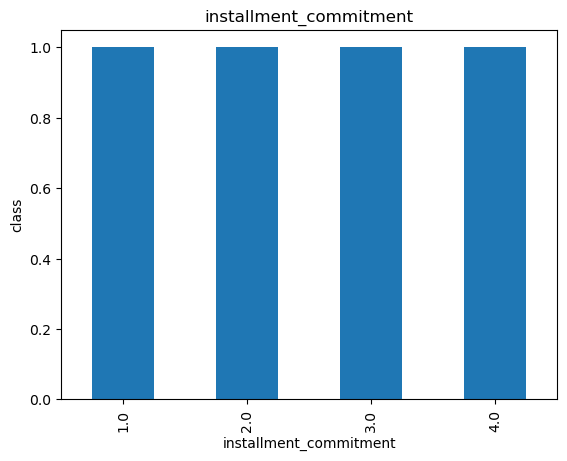

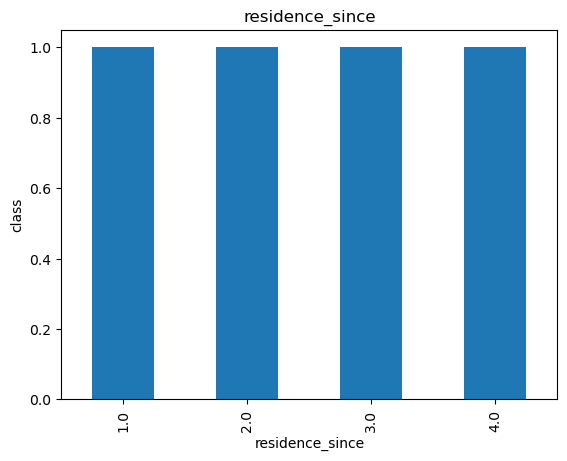

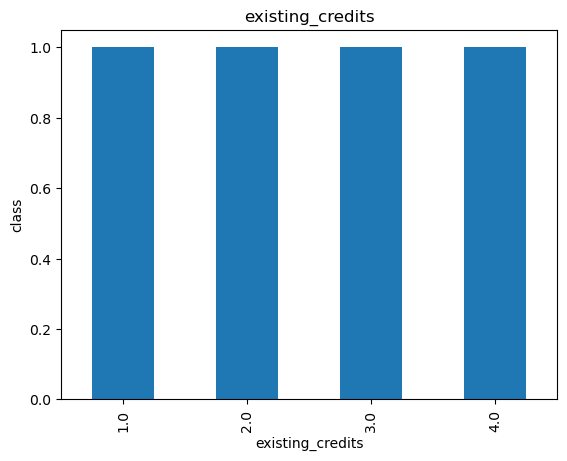

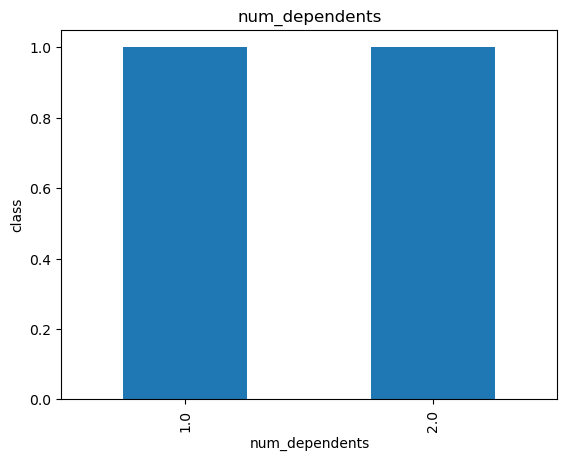

In [236]:
for feature in discrete_feature:
    discrete_data = data.copy()
    data.groupby(feature)['class'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('class')
    plt.title(feature)
    plt.show()

In [237]:
continous_feature=[feature for feature in numerical_feature if feature not in discrete_feature+['class']]
print('Continous Feature Count {}'.format(len(continous_feature)))

Continous Feature Count 3


In [238]:
for feature in categorical_feature:
    labels_ordered=data.groupby([feature])['class'].mean().sort_values().index
    labels_ordered={k:i for i,k in enumerate(labels_ordered,0)}
    data[feature]=data[feature].map(labels_ordered)

In [239]:
# dividing the dataset
from sklearn.model_selection import train_test_split 
X_train,X_test,y_train,y_test= train_test_split(data.drop(['class'], axis = 1),data['class'],test_size=0.3, random_state=0)

In [240]:
data.credit_history.unique()

array([4, 2, 3, 0, 1], dtype=int64)

In [241]:
data.groupby(["credit_history"])["class"].mean()

credit_history
0    0.375000
1    0.428571
2    0.681132
3    0.681818
4    0.829352
Name: class, dtype: float64

In [242]:
scaling_feature=[feature for feature in data.columns if feature not in ['class'] ]
len(scaling_feature)

21

In [243]:
feature_scale=[feature for feature in data.columns if feature not in ['class']]

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(data[feature_scale])

MinMaxScaler()

In [244]:
scaler.transform(data[feature_scale])

array([[0.        , 0.02941176, 1.        , ..., 0.        , 1.        ,
        1.        ],
       [0.33333333, 0.64705882, 0.5       , ..., 0.        , 0.        ,
        0.33333333],
       [1.        , 0.11764706, 1.        , ..., 0.        , 1.        ,
        1.        ],
       ...,
       [1.        , 0.11764706, 0.5       , ..., 0.        , 1.        ,
        1.        ],
       [0.        , 0.60294118, 0.5       , ..., 0.        , 1.        ,
        1.        ],
       [0.33333333, 0.60294118, 1.        , ..., 0.        , 1.        ,
        1.        ]])

In [245]:
data.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,other_parties,residence_since,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class,sex,marriage
0,0,6.0,4,7,1169.0,2,3,4.0,1,4.0,3,67.0,2,2,2.0,2,1.0,1,0,1,1,3
1,1,48.0,2,7,5951.0,0,2,2.0,1,2.0,3,22.0,2,2,1.0,2,1.0,0,0,0,0,1
2,3,12.0,4,0,2096.0,0,4,2.0,1,3.0,3,49.0,2,2,1.0,3,2.0,0,0,1,1,3
3,0,42.0,2,6,7882.0,0,4,2.0,2,4.0,2,45.0,2,0,1.0,2,2.0,0,0,1,1,3
4,0,24.0,3,2,4870.0,0,2,3.0,1,4.0,0,53.0,2,0,2.0,2,2.0,0,0,0,1,3


In [246]:
# for faeture selection
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

# to visualise al the columns in the dataframe
pd.pandas.set_option('display.max_columns', None)


In [247]:
feature_sel_model = SelectFromModel(Lasso(alpha=0.005, random_state=0)) # remember to set the seed, the random state in this function
feature_sel_model.fit(X_train, y_train)


SelectFromModel(estimator=Lasso(alpha=0.005, random_state=0))

In [248]:
feature_sel_model.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True, False,  True,  True,
        True, False,  True])

In [249]:
# this is how we can make a list of the selected features
selected_feat = X_train.columns[(feature_sel_model.get_support())]

# let's print some stats
print('total features: {}'.format((X_train.shape[1])))
print('selected features: {}'.format(len(selected_feat)))
print('features with coefficients shrank to zero: {}'.format(
    np.sum(feature_sel_model.estimator_.coef_ == 0)))



total features: 21
selected features: 18
features with coefficients shrank to zero: 3


In [250]:
selected_feat

Index(['checking_status', 'duration', 'credit_history', 'purpose',
       'credit_amount', 'savings_status', 'employment',
       'installment_commitment', 'other_parties', 'property_magnitude', 'age',
       'other_payment_plans', 'housing', 'existing_credits', 'num_dependents',
       'own_telephone', 'foreign_worker', 'marriage'],
      dtype='object')

In [251]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [252]:
for i in [X_train,X_test,y_train,y_test]:
    print(i.shape)

(700, 21)
(300, 21)
(700,)
(300,)


In [253]:
model.fit(X_train,y_train)
prediction = model.predict(X_test)

C:\Users\Ekeblonde\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [254]:
from sklearn.metrics import classification_report 
classification_report(y_test,prediction)

'              precision    recall  f1-score   support\n\n           0       0.59      0.51      0.55        86\n           1       0.81      0.86      0.83       214\n\n    accuracy                           0.76       300\n   macro avg       0.70      0.68      0.69       300\nweighted avg       0.75      0.76      0.75       300\n'

In [255]:
def model_eval(m):
    model = m
    model.fit(X_train,y_train)
    prediction = model.predict(X_test)
    print(model)
    print(classification_report(y_test,prediction))

In [256]:
model_eval(LogisticRegression())

LogisticRegression()
              precision    recall  f1-score   support

           0       0.59      0.51      0.55        86
           1       0.81      0.86      0.83       214

    accuracy                           0.76       300
   macro avg       0.70      0.68      0.69       300
weighted avg       0.75      0.76      0.75       300



C:\Users\Ekeblonde\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [257]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, max_features = 20)

In [258]:
model_eval(rf)

RandomForestClassifier(max_features=20)
              precision    recall  f1-score   support

           0       0.60      0.57      0.58        86
           1       0.83      0.85      0.84       214

    accuracy                           0.77       300
   macro avg       0.71      0.71      0.71       300
weighted avg       0.76      0.77      0.76       300

